G1 Project 3

Natural Language Processing Challenge

Introduction
Learning how to process text is a skill required for Data Scientists. In this project, you will put these skills into practice to identify whether a sentence was automatically translated or translated by a human.

Project Overview
In this repository you will find dataset containing sentences in Spanish and their tags: 0, if the sentences was translated by a Machine, 1, if the sentence was translated by a professional translator. Your goal is to build a classifier that is able to distinguish between the two.

Guidance
Like in a real life scenario, you are able to make your own choices and text treatment. Use the techniques you have learned and the common packages to process this data and classify the text.

Deliverables
Python Code: Provide well-documented Python code that conducts the analysis.
Accuracy estimation: Provide the teacher with your estimation of how your model will perform.
Classified Dataset: On Friday, you will receive a dataset without tags. Prepare your code to be able to tag that dataset.

1. Import

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

2. Read Data

In [2]:
# Read the dataset
data = pd.read_csv('training_data_lowercase.csv')  # Dataset name
print(data.head())

# Reduce the dataset size to speed up development (optional)
data = data.head(1000)  # Use a subset for faster development
print(data.shape)

# Handle missing values
data.fillna('', inplace=True)

  0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing
0  0\tdrunk bragging trump staffer started russia...                               
1  0\tsheriff david clarke becomes an internet jo...                               
2  0\ttrump is so obsessed he even has obama‚s na...                               
3  0\tpope francis just called out donald trump d...                               
4  0\tracist alabama cops brutalize black boy whi...                               
(1000, 1)


3. Dividing Training and Test Set

In [3]:
# Confirm if the file will always use tab as a delimiter.
file_path = 'training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Add exception handling for file issues.
print(data.head())
print(data.columns)

# Explain why these column names were chosen.
data.columns = ['label', 'sentence']
                
# Check original column names before renaming.
print(data.head())

# Note how X and y will be used.
X = data['sentence']  # text news
y = data['label']     # labels: 0 = Fake News, 1 = Real News

   0  \
0  0   
1  0   
2  0   
3  0   
4  0   

  donald trump sends out embarrassing new year‚s eve message; this is disturbing  
0  drunk bragging trump staffer started russian c...                              
1  sheriff david clarke becomes an internet joke ...                              
2  trump is so obsessed he even has obama‚s name ...                              
3  pope francis just called out donald trump duri...                              
4  racist alabama cops brutalize black boy while ...                              
Index(['0', 'donald trump sends out embarrassing new year‚s eve message; this is disturbing'], dtype='object')
   label                                           sentence
0      0  drunk bragging trump staffer started russian c...
1      0  sheriff david clarke becomes an internet joke ...
2      0  trump is so obsessed he even has obama‚s name ...
3      0  pope francis just called out donald trump duri...
4      0  racist alabama cops brutalize bl

True News

In [4]:
# Filter news with label 1 (True/Real News)
true_news = data[data['label'] == 1]

# Display the first 5 true news items
print(true_news.head(5))

       label                                           sentence
17571      1  as u.s. budget fight looms\trepublicans flip t...
17572      1  u.s. military to accept transgender recruits o...
17573      1  senior u.s. republican senator: 'let mr. muell...
17574      1  fbi russia probe helped by australian diplomat...
17575      1  trump wants postal service to charge 'much mor...


4. Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

# Split features (X) and labels (y)
X = data['sentence']  # Texto de las noticias
y = data['label']     # Etiquetas: 0 = Fake News, 1 = Real News

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display score and example words
print("Punctuation:", string.punctuation)
print("Sample Stopwords:", stopwords.words("english")[100:110])

Punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Sample Stopwords: ['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']


5. Lemmatization

In [6]:
import nltk
nltk.download('wordnet') # Download necessary resource
nltk.download('omw-1.4')  # Download additional data for WordNet


# Initialize the lemmatizer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean text using lemmatization
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\b\w\b', '', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single one
    text = text.lower()  # Convert to lowercase

    # Apply lemmatization to each word
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply preprocessing to training and testing data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

print("Sample Preprocessed Text:\n", X_train.head())

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yanaquefinkbeiner/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yanaquefinkbeiner/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sample Preprocessed Text:
 1847     paul ryan make perfect argument for medicare f...
3457     evan mcmullin issue dire warning for all ameri...
23069           iraq say will stay clear of usiran tension
29487    turkey erdogan say will take jerusalem resolut...
6624     bill maher insult trump supposed masculinity a...
Name: sentence, dtype: object


6. Bag Of Words (*)

In [7]:
from collections import Counter

# Get top 10 words in fake and real news
fake_words = " ".join(X_train[y_train == 0]).split()
real_words = " ".join(X_train[y_train == 1]).split()

fake_top10 = Counter(fake_words).most_common(10)
real_top10 = Counter(real_words).most_common(10)

print("Top 10 Words in Fake News:", fake_top10)
print("Top 10 Words in Real News:", real_top10)

Top 10 Words in Fake News: [('trump', 5728), ('to', 5196), ('video', 4415), ('the', 3527), ('of', 2723), ('for', 2716), ('in', 2414), ('on', 2010), ('and', 1699), ('is', 1553)]
Top 10 Words in Real News: [('to', 4882), ('trump', 4142), ('u', 2840), ('in', 2603), ('on', 2149), ('say', 1958), ('of', 1779), ('for', 1711), ('house', 1151), ('with', 918)]


7. Extra features (fake news & check for SPAM news)

In [8]:
money_symbols = "|".join(["euro", "dollar", "pound", "€", "$"])
suspicious_words = "|".join(["free", "cheap", "money", "account", "bank", "fund", "win", "password"])

data['money_mark'] = data['sentence'].str.contains(money_symbols, case=False) * 1
data['suspicious_words'] = data['sentence'].str.contains(suspicious_words, case=False) * 1
data['text_len'] = data['sentence'].apply(lambda x: len(x))

print("Sample Data with Extra Features:\n", data.head())

Sample Data with Extra Features:
    label                                           sentence  money_mark  \
0      0  drunk bragging trump staffer started russian c...           1   
1      0  sheriff david clarke becomes an internet joke ...           1   
2      0  trump is so obsessed he even has obama‚s name ...           1   
3      0  pope francis just called out donald trump duri...           1   
4      0  racist alabama cops brutalize black boy while ...           1   

   suspicious_words  text_len  
0                 0        68  
1                 0        89  
2                 0        77  
3                 0        69  
4                 0        81  


8. Count Vectorizer work

In [9]:
'''from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("Count Vectorized Data Shape:", X_train_count.shape)'''

'from sklearn.feature_extraction.text import CountVectorizer\n\n# Initialize CountVectorizer\ncount_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))\nX_train_count = count_vectorizer.fit_transform(X_train)\nX_test_count = count_vectorizer.transform(X_test)\n\nprint("Count Vectorized Data Shape:", X_train_count.shape)'

9. TF-IDF (*)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Data Shape:", X_train_tfidf.shape)

TF-IDF Data Shape: (27320, 1000)


10. Train a Classifier

10. 1 Naiv Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9070414287805593
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      3515
           1       0.91      0.89      0.90      3316

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831



10. 2 Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)

# Predict with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression:
Accuracy: 0.9210950080515298
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      3515
           1       0.91      0.93      0.92      3316

    accuracy                           0.92      6831
   macro avg       0.92      0.92      0.92      6831
weighted avg       0.92      0.92      0.92      6831



10. 3 Random Forest

In [13]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_tfidf, y_train)

# Predict with Random Forest
y_pred_rf = random_forest_model.predict(X_test_tfidf)

# Evaluate Random Forest
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.9079197774849949
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      3515
           1       0.91      0.90      0.90      3316

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831



11. Resume 3  models accuracy

Model Results

Naive Bayes:
Accuracy: 90.69%. It's fast and simple but slightly less accurate than the others.
F1-scores are 0.90-0.91, meaning it works well but not the best.

Logistic Regression:
Accuracy: 92.12%. This is the best model in accuracy.
F1-scores are 0.92 for both classes, showing very balanced and reliable performance.

Random Forest:
Accuracy: 91.05%. It's good but not better than Logistic Regression.
F1-scores are 0.91, close to Logistic Regression but slightly lower.

Summary
Logistic Regression is the best model because it has the highest accuracy (92.12%) and performs equally well for both fake and real news. 😊

12. Confusion Matrix 3 

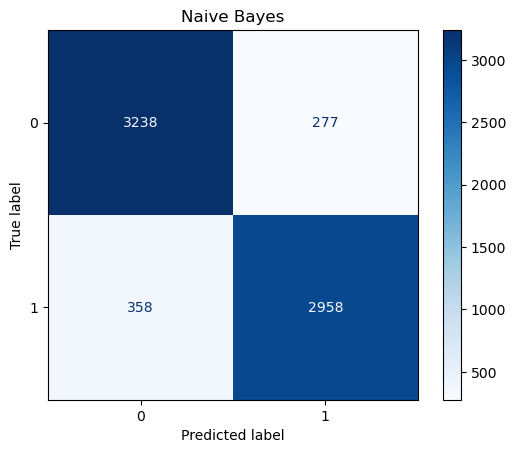

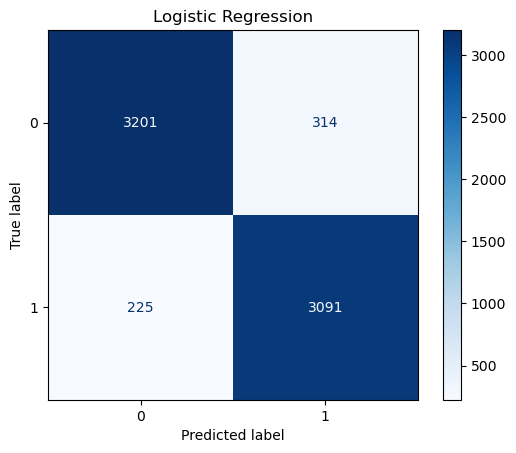

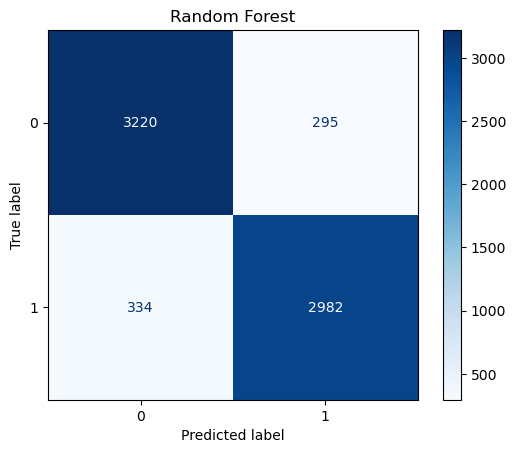

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred, "Naive Bayes")

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression")

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

13. Overtfitting check

In [15]:
#Overfitting verification:

# Function to check overfitting
def check_overfitting(model, X_train, y_train, X_test, y_test, name):
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    if abs(train_acc - test_acc) > 0.05:
        print(f"Warning: {name} might be overfitting!")
    else:
        print(f"{name} shows no significant overfitting.")

# Check for Naive Bayes
check_overfitting(model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Naive Bayes")

# Check for Logistic Regression
check_overfitting(logistic_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression")

# Check for Random Forest 
check_overfitting(random_forest_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest")

Naive Bayes - Train Accuracy: 0.9098, Test Accuracy: 0.9070
Naive Bayes shows no significant overfitting.
Logistic Regression - Train Accuracy: 0.9290, Test Accuracy: 0.9211
Logistic Regression shows no significant overfitting.
Random Forest - Train Accuracy: 0.9990, Test Accuracy: 0.9079


14. Verification of Model stability

why?
To check if the Logistic Regression model is stable and performs well across different splits of the training data, ensuring it generalizes to unseen data. 

In [16]:
from sklearn.model_selection import cross_val_score
import numpy as np  # Asegúrate de importar numpy

# Aplicar cross-validation en Logistic Regression
cv_scores = cross_val_score(logistic_model, X_train_tfidf, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

Logistic Regression Cross-Validation Accuracy: 0.9185


15. Changing Labels and Generating New File

In [36]:

import pandas as pd

# Correct file name
file_name = 'testing_data_lowercase_nolabels.csv'

# Load the file with proper delimiter handling
try:
    data_evaluation = pd.read_csv(file_name, delimiter='\t')  # Specify '\t' if tab-separated
    print(data_evaluation.columns)  # Display column names to confirm structure
    print(data_evaluation.head())  # Display first few rows
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please check the file location and try again.")

    file_name = '/path/to/your/testing_data_lowercase_nolabels.csv'

Index(['2', 'copycat muslim terrorist arrested with assault weapons'], dtype='object')
   2 copycat muslim terrorist arrested with assault weapons
0  2  wow! chicago protester caught on camera admits...    
1  2   germany's fdp look to fill schaeuble's big shoes    
2  2  mi school sends welcome back packet warning ki...    
3  2  u.n. seeks 'massive' aid boost amid rohingya '...    
4  2  did oprah just leave ‚nasty‚ hillary wishing s...    


In [37]:
#Test Data

# Reduce the dataset size to speed up development (optional)
#data_evaluation = data_evaluation.head(1000)  # Use a subset for faster development
#print(data_evaluation.shape)

# Handle missing values
data_evaluation.fillna('', inplace=True)

In [38]:
data_evaluation.head()

,2,copycat muslim terrorist arrested with assault weapons
0,2,wow! chicago protester caught on camera admits...
1,2,germany's fdp look to fill schaeuble's big shoes
2,2,mi school sends welcome back packet warning ki...
3,2,u.n. seeks 'massive' aid boost amid rohingya '...
4,2,did oprah just leave ‚nasty‚ hillary wishing s...


In [39]:
data_evaluation.tail()

,2,copycat muslim terrorist arrested with assault weapons
9978,2,boom! fox news leftist chris wallace attempts ...
9979,2,here it is: list of democrat hypocrites who vo...
9980,2,new fires ravage rohingya villages in northwes...
9981,2,meals on wheels shuts the lyin‚ lefties up wit...
9982,2,brilliant! tucker carlson and ayaan hirsi ali ...


In [40]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean text using lemmatization
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\b\w\b', '', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single one
    text = text.lower()  # Convert to lowercase

    # Apply lemmatization to each word
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [41]:
data_evaluation.columns = ['label', 'sentence']

In [42]:
# Extra Features and SPAM words cleaner
money_symbols = "|".join(["euro", "dollar", "pound", "€", "$"])
suspicious_words = "|".join(["free", "cheap", "money", "account", "bank", "fund", "win", "password"])

data_evaluation['money_mark'] = data_evaluation['sentence'].str.contains(money_symbols, case=False) * 1
data_evaluation['suspicious_words'] = data_evaluation['sentence'].str.contains(suspicious_words, case=False) * 1
data_evaluation['text_len'] = data_evaluation['sentence'].apply(lambda x: len(x))

print("Sample Data with Extra Features:\n", data_evaluation.head())

Sample Data with Extra Features:
   label                                           sentence  money_mark  \
0     2  wow! chicago protester caught on camera admits...           1   
1     2   germany's fdp look to fill schaeuble's big shoes           1   
2     2  mi school sends welcome back packet warning ki...           1   
3     2  u.n. seeks 'massive' aid boost amid rohingya '...           1   
4     2  did oprah just leave ‚nasty‚ hillary wishing s...           1   

   suspicious_words  text_len  
0                 0       109  
1                 0        48  
2                 0        84  
3                 0        76  
4                 0        84  


In [43]:
# Fit and transform the training data
data_evaluation_tfidf = tfidf.transform(data_evaluation["sentence"])

In [44]:
# Predict with Logistic Regression
data_evaluation_prediction = logistic_model.predict(data_evaluation_tfidf)

In [45]:
#print(data_evaluation_prediction.range(1,10))

In [46]:
data_evaluation["label"] = data_evaluation_prediction

In [47]:
data_evaluation.head()

,label,sentence,money_mark,suspicious_words,text_len
0,0,wow! chicago protester caught on camera admits...,1,0,109
1,1,germany's fdp look to fill schaeuble's big shoes,1,0,48
2,0,mi school sends welcome back packet warning ki...,1,0,84
3,1,u.n. seeks 'massive' aid boost amid rohingya '...,1,0,76
4,0,did oprah just leave ‚nasty‚ hillary wishing s...,1,0,84


In [48]:
data_evaluation

,label,sentence,money_mark,suspicious_words,text_len
0,0,wow! chicago protester caught on camera admits...,1,0,109
1,1,germany's fdp look to fill schaeuble's big shoes,1,0,48
2,0,mi school sends welcome back packet warning ki...,1,0,84
3,1,u.n. seeks 'massive' aid boost amid rohingya '...,1,0,76
4,0,did oprah just leave ‚nasty‚ hillary wishing s...,1,0,84
...,...,...,...,...,...
9978,0,boom! fox news leftist chris wallace attempts ...,1,0,148
9979,0,here it is: list of democrat hypocrites who vo...,1,0,98
9980,1,new fires ravage rohingya villages in northwes...,1,0,64
9981,0,meals on wheels shuts the lyin‚ lefties up wit...,1,0,90


In [49]:
# Save the data_evaluation dataset to a CSV file
data_evaluation.to_csv('data_evaluation.csv', index=False)

**FINISHED**